
📄 Recommendations saved as 'subscription_recommendations.csv'


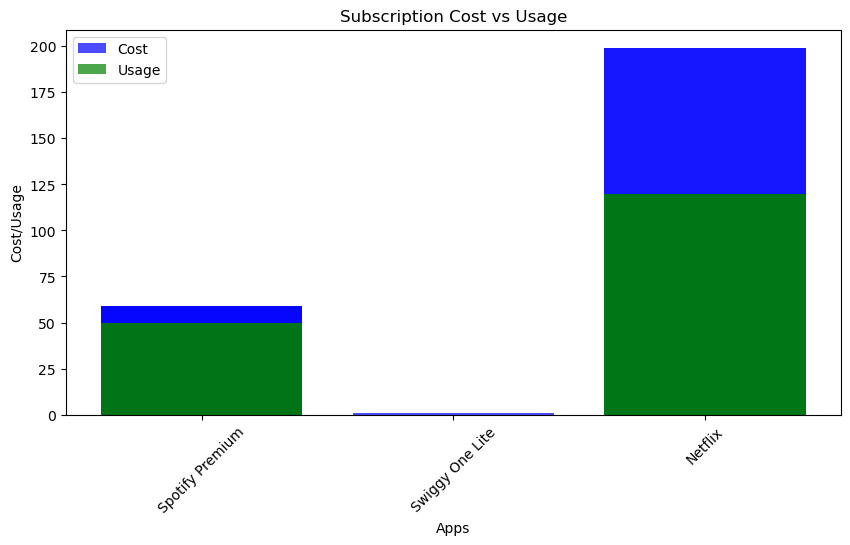


🖼️ Graph saved as 'subscription_graph.png'

📄 Full report saved as 'subscription_report.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load Extracted Data
df = pd.read_csv("subscription_details.csv")  # Replace with actual file name

# 🔹 Data Cleaning
df["Total (INR)"] = pd.to_numeric(df["Total (INR)"], errors="coerce")  # Convert to numeric
df["Usage"] = pd.to_numeric(df["Usage"], errors="coerce")  # Convert to numeric
df.fillna({"Total (INR)": 0, "Usage": 1}, inplace=True)  # Replace NaN values

# 🔹 Cost Per Hour Calculation
df["Cost per Hour"] = df["Total (INR)"] / df["Usage"].replace(0, 1)  # Avoid division by zero

# 🔹 Categorization Based on Usage
def categorize_subscription(usage):
    if usage < 5:
        return "Cancel"
    elif 5 <= usage < 15:
        return "Consider Downgrade"
    else:
        return "Keep"

df["Recommendation"] = df["Usage"].apply(categorize_subscription)

# 🔹 Store Recommendations Separately
recommendations_df = df[["Platform", "Total (INR)", "Usage", "Recommendation"]]
recommendations_df.to_csv("subscription_recommendations.csv", index=False)
print("\n📄 Recommendations saved as 'subscription_recommendations.csv'")

# 🔹 Visualization
plt.figure(figsize=(10, 5))
plt.bar(df["Platform"], df["Total (INR)"], color="blue", alpha=0.7, label="Cost")
plt.bar(df["Platform"], df["Usage"], color="green", alpha=0.7, label="Usage")
plt.xlabel("Apps")
plt.ylabel("Cost/Usage")
plt.legend()
plt.title("Subscription Cost vs Usage")
plt.xticks(rotation=45)

# 🔹 Save the Graph as an Image
plt.savefig("subscription_graph.png")
plt.show()

print("\n🖼️ Graph saved as 'subscription_graph.png'")

# 🔹 Export Full Report
df.to_csv("subscription_report.csv", index=False)
print("\n📄 Full report saved as 'subscription_report.csv'")
